In [1]:
pacman::p_load(tidyverse, reshape2, scales, ggthemes, plotly, ggpubr, ggalluvial,RColorBrewer, ggrepel)

In [38]:
df <- read.csv('TD_524_SEP.csv', sep = "|")
df <- rbind(df, read.csv('TD_524_OCT.csv', sep = "|"))
df <- rbind(df, read.csv('TD_524_NOV.csv', sep = "|"))
df <- rbind(df, read.csv('TD_524_DEC.csv', sep = "|"))
df$VALUE_DATE <- as.Date(df$VALUE_DATE, '%m/%d/%Y')
df <- df %>% mutate(MONTH = format(VALUE_DATE,'%m-%Y'))
df <- df %>% filter(OPENING_AMOUNT > 0)
head(df)

,CLIENT_NO,ONLINE_TD_ID,VALUE_DATE,MATURITY_DATE,TERM_BY_DAY,TERM_CODE,OPENING_AMOUNT,ROLLOVER_FLAG,MONTH
,<int>,<dbl>,<date>,<chr>,<int>,<chr>,<dbl>,<int>,<chr>
1,1042790,26079453,2022-09-15,10/15/2022,31,001M,4.0e+07,0,09-2022
2,2224633,26485603,2022-09-25,10/25/2022,31,001M,1.0e+07,0,09-2022
3,2673072,26664112,2022-09-29,12/29/2022,92,003M,1.0e+07,0,09-2022
4,556161,25895090,2022-09-12,12/12/2022,92,003M,2.7e+06,0,09-2022
5,584889,25348360,2022-09-29,10/29/2022,31,001M,1.0e+07,1,09-2022
6,271668,26521693,2022-09-26,3/26/2023,182,006M,2.0e+09,0,09-2022


In [63]:
T10 <- read.csv('df_HIGH_POTENTIAL_TD_ONLINE_11.csv')
T10$flag <- ifelse(T10$td_online_proba_11 >=0.5, 1, 0)
selected_t10 <- T10[T10$flag == 1,]$client_no
non_selected_t10 <- T10[T10$flag == 0,]$client_no
both_t10 <- T10$client_no
head(T10)

,client_no,td_online_proba_11,flag
,<int>,<dbl>,<dbl>
1,2014486,0.02720958,0
2,2015309,0.04210175,0
3,1852802,0.60036790,1
4,1853296,0.06379661,0
5,2031511,0.82217070,1
6,1887904,0.23318623,0


In [24]:
selected <- readxl::read_excel('client_list.xlsx')
selected <- selected$client_no
head(selected)
non_selected <- read.csv('df_HIGH_POTENTIAL_TD_ONLINE_12.csv', sep = ',')
non_selected <- non_selected$client_no
head(non_selected)
both <- c(selected, non_selected)
head(both)

[1] 190011 257834 263236 314821 376753 481736

[1] 460368 215275 326356 376753 418627 481736

[1] 190011 257834 263236 314821 376753 481736

In [29]:
cam_date <- as.Date('23/11/2022', '%d/%m/%Y')

In [64]:
boths <- c(both_t10, both)
sub_df <- df %>% filter(CLIENT_NO %in% boths)
nrow(sub_df)

[1] 195123

# PLOTS

In [49]:
# model performance
performance <- data.frame(Month = NA,
                          Export = NA,
                          Match = NA)
performance <- rbind(performance, data.frame(Month = 'NOV 2022',
                                            Export = length(selected_t10),
                                            Match = nrow(df %>% filter(MONTH == '11-2022') %>% filter(CLIENT_NO %in% selected_t10) %>% select(CLIENT_NO) %>% unique())
                                            ))
performance <- rbind(performance, data.frame(Month = 'DEC 2022',
                                            Export = length(selected),
                                            Match = nrow(df %>% filter(MONTH == '12-2022') %>% filter(CLIENT_NO %in% selected) %>% select(CLIENT_NO) %>% unique())
                                            ))
performance <- na.omit(performance)
performance <- performance %>% mutate(Precision = Match / Export)
performance

,Month,Export,Match,Precision
,<chr>,<int>,<int>,<dbl>
2,NOV 2022,14331,11513,0.8033633
3,DEC 2022,17212,10472,0.6084127


Using Month as id variables



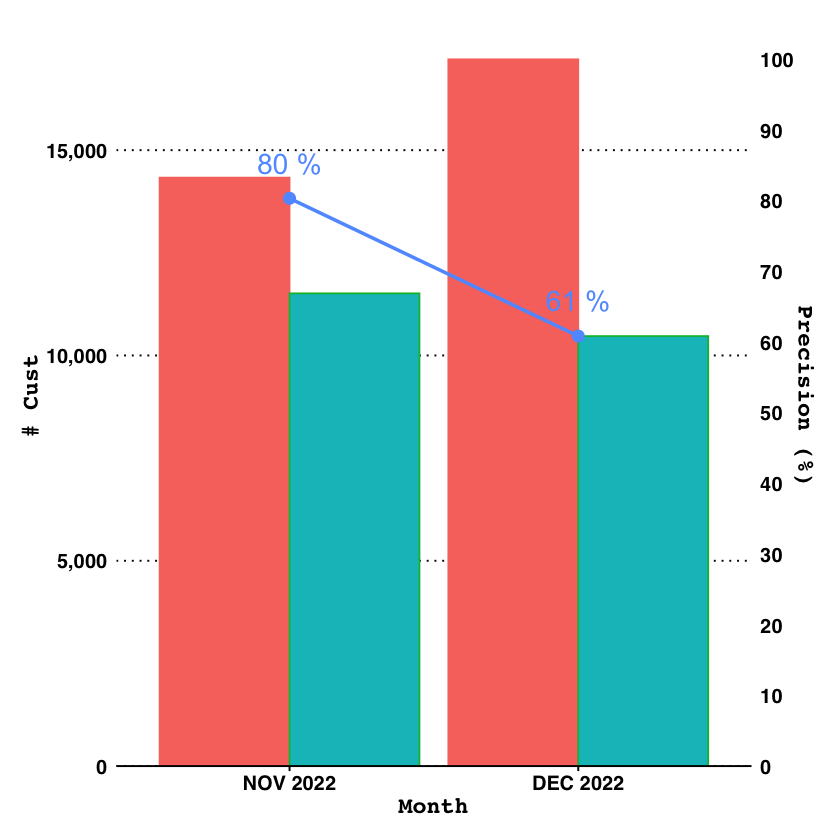

In [62]:
y_max <- max(performance %>% select(is.numeric))
scaleRight <- 100 / y_max
ggplot(melt(performance %>% select(-Precision) %>% mutate(Month = factor(Month, levels = c('NOV 2022', 'DEC 2022')))), aes(x = Month)) +
    geom_bar(aes(y = value, fill = variable, color = variable),  stat = 'identity', position = "dodge") +
    geom_point(data = performance, aes( y = Precision * 100 / scaleRight, group = 1, color = 'Precision'), size = 3) +
    geom_line(data = performance, aes( y = Precision * 100 / scaleRight, group = 1, color = 'Precision'), size = 1) +
    geom_text(data = performance, aes(y = (Precision * 100 + 5) / scaleRight , label = paste(round(Precision,2)*100, '%'), color = 'Precision'),show.legend=F, size = 6) +
    scale_y_continuous(labels = comma, expand = expansion(mult = c(0,.05)),
                    sec.axis = sec_axis(~.*scaleRight, name = "Precision (%)",
                                        breaks=seq(0,100,10))) +
    theme_wsj() +
    guides(color = guide_legend(nrow = 1), fill="none") +
    labs( y="# Cust", x="Month") +
    theme(axis.text=element_text(size=12), legend.position = 'none',
        axis.title=element_text(size=14,face="bold"),
        legend.title=element_blank(), plot.title = element_text(face="bold", size = 20),
        panel.background = element_rect(fill = 'white'), plot.background = element_rect(fill = 'white'),legend.background = element_rect(fill = 'white'))

In [65]:
head(sub_df)

,CLIENT_NO,ONLINE_TD_ID,VALUE_DATE,MATURITY_DATE,TERM_BY_DAY,TERM_CODE,OPENING_AMOUNT,ROLLOVER_FLAG,MONTH
,<int>,<dbl>,<date>,<chr>,<int>,<chr>,<dbl>,<int>,<chr>
1,1042790,26079453,2022-09-15,10/15/2022,31,001M,4.0e+07,0,09-2022
2,2224633,26485603,2022-09-25,10/25/2022,31,001M,1.0e+07,0,09-2022
3,556161,25895090,2022-09-12,12/12/2022,92,003M,2.7e+06,0,09-2022
4,584889,25348360,2022-09-29,10/29/2022,31,001M,1.0e+07,1,09-2022
5,271668,26521693,2022-09-26,3/26/2023,182,006M,2.0e+09,0,09-2022
6,2178548,25621406,2022-09-05,9/12/2022,8,001W,3.5e+07,0,09-2022


## Average tenor

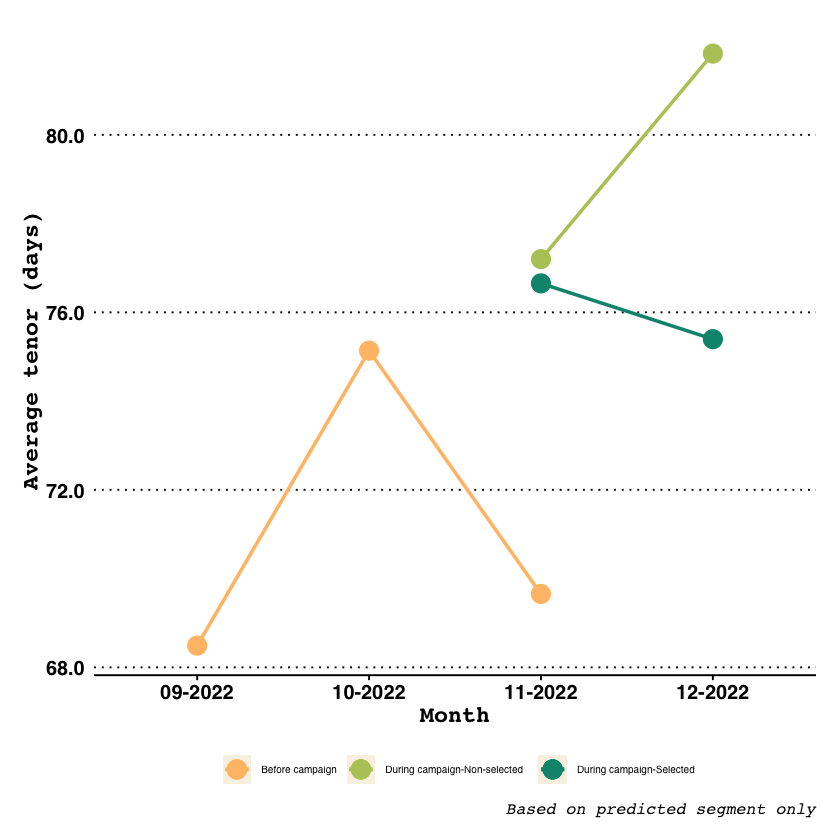

In [67]:

tmp <- sub_df %>% filter(VALUE_DATE < cam_date) %>% filter(CLIENT_NO %in% boths) %>%
                group_by(MONTH) %>% 
                summarise(Tenor = mean(TERM_BY_DAY, na.rm = TRUE))
tmp_ <- sub_df %>% filter(VALUE_DATE >= cam_date) %>% filter(CLIENT_NO %in% c(selected_t10, selected)) %>%
                group_by(MONTH) %>% 
                summarise(Tenor = mean(TERM_BY_DAY, na.rm = TRUE))
tmp__ <- sub_df %>% filter(VALUE_DATE >= cam_date) %>% filter(CLIENT_NO %in% c(non_selected_t10, non_selected)) %>%
                group_by(MONTH) %>% 
                summarise(Tenor = mean(TERM_BY_DAY, na.rm = TRUE))
ggplot() + 
geom_line(data = tmp , aes(x = MONTH, y = Tenor, group = 1, color = 'Before campaign'), size = 1) +
geom_point(data = tmp , aes(x = MONTH, y = Tenor, group = 1, color = 'Before campaign'), size = 5) +
geom_line(data = tmp__ , aes(x = MONTH, y = Tenor, group = 1, color = 'During campaign-Non-selected'), size = 1) +
geom_point(data = tmp__ , aes(x = MONTH, y = Tenor, group = 1, color = 'During campaign-Non-selected'), size = 5) +
geom_line(data = tmp_ , aes(x = MONTH, y = Tenor, group = 1, color = 'During campaign-Selected'), size = 1) +
geom_point(data = tmp_ , aes(x = MONTH, y = Tenor, group = 1, color = 'During campaign-Selected'), size = 5) +
scale_y_continuous(labels = comma) +
labs(x = 'Month', y = 'Average tenor (days)', caption = 'Based on predicted segment only') +
theme_wsj() +
scale_color_manual(values = c('#FFC074','#B6C867','#01937C')) + 
# theme(legend.title = element_blank(), legend.position = 'bottom', axis.title.y= element_text())
theme(legend.title = element_blank(), legend.position = 'bottom',axis.title.y= element_text(), axis.text=element_text(size=12),
      axis.title=element_text(size=14,face="bold"), plot.caption = element_text(size = 10, face = 'italic'),
      legend.text = element_text(size = 6),panel.background = element_rect(fill = 'white'), plot.background = element_rect(fill = 'white'),
      legend.background = element_rect(fill = 'white'))

## Average tenor per cust

`summarise()` has grouped output by 'MONTH'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'MONTH'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'MONTH'. You can override using the `.groups` argument.



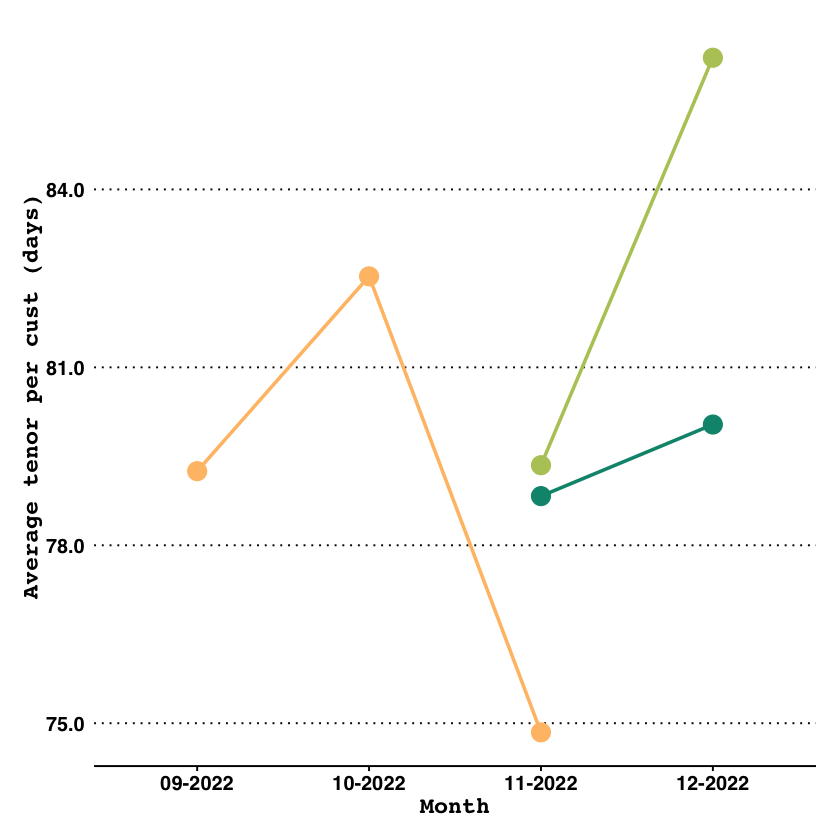

In [69]:


tmp <- sub_df %>% filter(VALUE_DATE < cam_date) %>% filter(CLIENT_NO %in% boths) %>%
                group_by(MONTH, CLIENT_NO) %>% 
                summarise(Tenor = sum(TERM_BY_DAY, na.rm = TRUE)) %>%
                group_by(MONTH) %>%
                summarise(Tenor = mean(Tenor, na.rm = TRUE))
tmp_ <- sub_df %>% filter(VALUE_DATE >= cam_date) %>% filter(CLIENT_NO %in% c(selected_t10, selected)) %>%
                group_by(MONTH, CLIENT_NO) %>% 
                summarise(Tenor = sum(TERM_BY_DAY, na.rm = TRUE)) %>%
                group_by(MONTH) %>%
                summarise(Tenor = mean(Tenor, na.rm = TRUE))
tmp__ <- sub_df %>% filter(VALUE_DATE >= cam_date) %>% filter(CLIENT_NO %in% c(non_selected_t10, non_selected)) %>%
                group_by(MONTH, CLIENT_NO) %>% 
                summarise(Tenor = sum(TERM_BY_DAY, na.rm = TRUE)) %>%
                group_by(MONTH) %>%
                summarise(Tenor = mean(Tenor, na.rm = TRUE))
ggplot() + 
geom_line(data = tmp , aes(x = MONTH, y = Tenor, group = 1, color = 'Before campaign'), size = 1) +
geom_point(data = tmp , aes(x = MONTH, y = Tenor, group = 1, color = 'Before campaign'), size = 5) +
geom_line(data = tmp__ , aes(x = MONTH, y = Tenor, group = 1, color = 'During campaign-Non-selected'), size = 1) +
geom_point(data = tmp__ , aes(x = MONTH, y = Tenor, group = 1, color = 'During campaign-Non-selected'), size = 5) +
geom_line(data = tmp_ , aes(x = MONTH, y = Tenor, group = 1, color = 'During campaign-Selected'), size = 1) +
geom_point(data = tmp_ , aes(x = MONTH, y = Tenor, group = 1, color = 'During campaign-Selected'), size = 5) +
scale_y_continuous(labels = comma) +
labs(x = 'Month', y = 'Average tenor per cust (days)') +
theme_wsj() +
scale_color_manual(values = c('#FFC074','#B6C867','#01937C')) + 
# theme(legend.title = element_blank(), legend.position = 'bottom', axis.title.y= element_text())
theme(legend.position = 'none',axis.title.y= element_text(), axis.text=element_text(size=12),axis.title=element_text(size=14,face="bold"),
      panel.background = element_rect(fill = 'white'), plot.background = element_rect(fill = 'white'))
# theme(legend.title = element_blank(), legend.position = 'bottom',axis.title.y= element_text(), axis.text=element_text(size=12),
#       axis.title=element_text(size=14,face="bold"), plot.caption = element_text(size = 10, face = 'italic'),
#       legend.text = element_text(size = 6),panel.background = element_rect(fill = 'white'), plot.background = element_rect(fill = 'white'),
#       legend.background = element_rect(fill = 'white'))


## Average outstanding balance

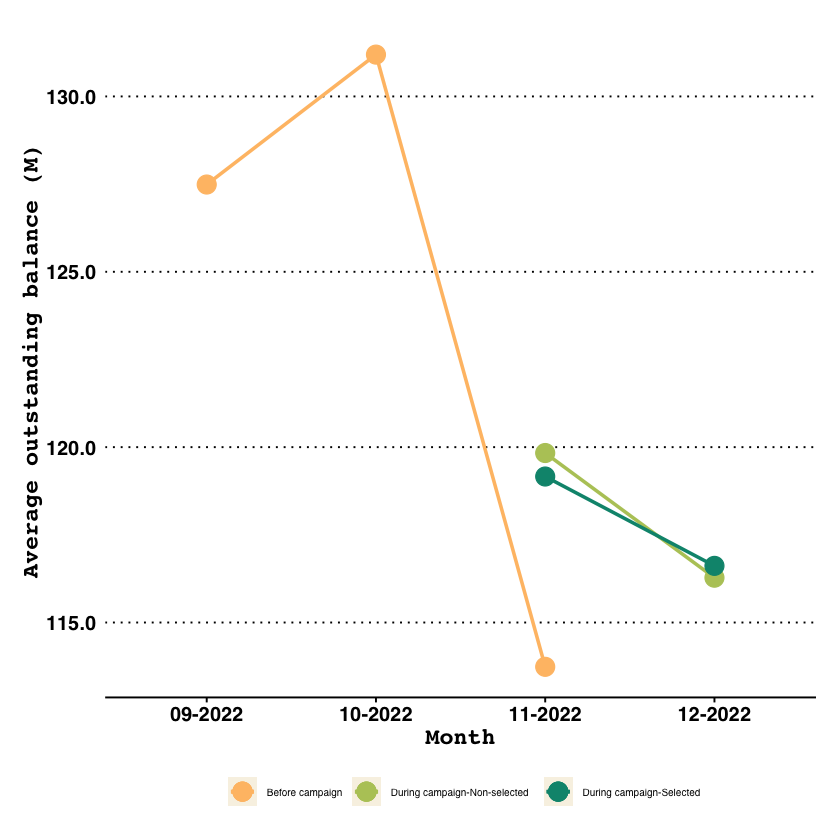

In [71]:
tmp <- sub_df %>% filter(VALUE_DATE < cam_date) %>% filter(CLIENT_NO %in% boths) %>%
                group_by(MONTH) %>% 
                summarise(AMT = mean(OPENING_AMOUNT, na.rm = TRUE))
tmp_ <- sub_df %>% filter(VALUE_DATE >= cam_date) %>% filter(CLIENT_NO %in% c(selected_t10, selected)) %>%
                group_by(MONTH) %>% 
                summarise(AMT = mean(OPENING_AMOUNT, na.rm = TRUE))
tmp__ <- sub_df %>% filter(VALUE_DATE >= cam_date) %>% filter(CLIENT_NO %in% c(non_selected_t10, non_selected)) %>%
                group_by(MONTH) %>% 
                summarise(AMT = mean(OPENING_AMOUNT, na.rm = TRUE))
ggplot() + 
geom_line(data = tmp , aes(x = MONTH, y = AMT/10^6, group = 1, color = 'Before campaign'), size = 1) +
geom_point(data = tmp , aes(x = MONTH, y = AMT/10^6, group = 1, color = 'Before campaign'), size = 5) +
geom_line(data = tmp__ , aes(x = MONTH, y = AMT/10^6, group = 1, color = 'During campaign-Non-selected'), size = 1) +
geom_point(data = tmp__ , aes(x = MONTH, y = AMT/10^6, group = 1, color = 'During campaign-Non-selected'), size = 5) +
geom_line(data = tmp_ , aes(x = MONTH, y = AMT/10^6, group = 1, color = 'During campaign-Selected'), size = 1) +
geom_point(data = tmp_ , aes(x = MONTH, y = AMT/10^6, group = 1, color = 'During campaign-Selected'), size = 5) +
scale_y_continuous(labels = comma) +
labs(x = 'Month', y = 'Average outstanding balance (M)') +
theme_wsj() +
scale_color_manual(values = c('#FFC074','#B6C867','#01937C')) + 
# theme(legend.title = element_blank(), legend.position = 'bottom', axis.title.y= element_text())
theme(legend.title = element_blank(), legend.position = 'bottom',axis.title.y= element_text(), axis.text=element_text(size=12),
      axis.title=element_text(size=14,face="bold"), plot.caption = element_text(size = 10, face = 'italic'),
      legend.text = element_text(size = 6),panel.background = element_rect(fill = 'white'), plot.background = element_rect(fill = 'white'),
      legend.background = element_rect(fill = 'white'))

## Average outstanding balance per cust

`summarise()` has grouped output by 'MONTH'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'MONTH'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'MONTH'. You can override using the `.groups` argument.



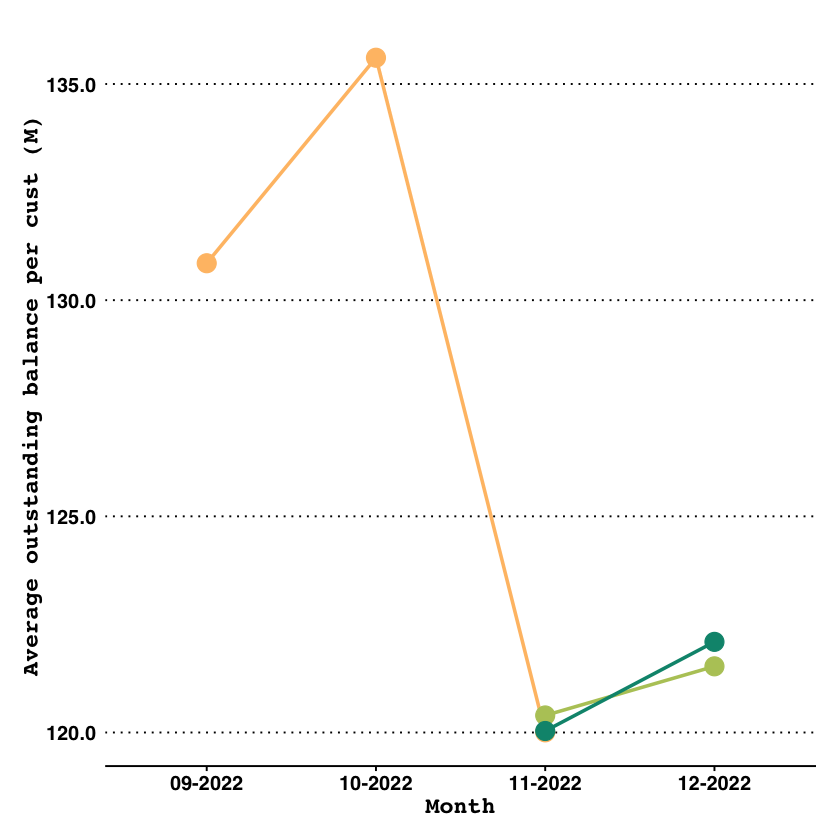

In [72]:
tmp <- sub_df %>% filter(VALUE_DATE < cam_date) %>% filter(CLIENT_NO %in% boths) %>%
                group_by(MONTH, CLIENT_NO) %>% 
                summarise(AMT = sum(OPENING_AMOUNT, na.rm = TRUE)) %>%
                group_by(MONTH) %>%
                summarise(AMT = mean(AMT, na.rm = TRUE)/10^6)
tmp_ <- sub_df %>% filter(VALUE_DATE >= cam_date) %>% filter(CLIENT_NO %in% c(selected_t10, selected)) %>%
                group_by(MONTH, CLIENT_NO) %>% 
                summarise(AMT = sum(OPENING_AMOUNT, na.rm = TRUE)) %>%
                group_by(MONTH) %>%
                summarise(AMT = mean(AMT, na.rm = TRUE)/10^6)
tmp__ <- sub_df %>% filter(VALUE_DATE >= cam_date) %>% filter(CLIENT_NO %in% c(non_selected_t10, non_selected)) %>%
                group_by(MONTH, CLIENT_NO) %>% 
                summarise(AMT = sum(OPENING_AMOUNT, na.rm = TRUE)) %>%
                group_by(MONTH) %>%
                summarise(AMT = mean(AMT, na.rm = TRUE)/10^6)
ggplot() + 
geom_line(data = tmp , aes(x = MONTH, y = AMT, group = 1, color = 'Before campaign'), size = 1) +
geom_point(data = tmp , aes(x = MONTH, y = AMT, group = 1, color = 'Before campaign'), size = 5) +
geom_line(data = tmp__ , aes(x = MONTH, y = AMT, group = 1, color = 'During campaign-Non-selected'), size = 1) +
geom_point(data = tmp__ , aes(x = MONTH, y = AMT, group = 1, color = 'During campaign-Non-selected'), size = 5) +
geom_line(data = tmp_ , aes(x = MONTH, y = AMT, group = 1, color = 'During campaign-Selected'), size = 1) +
geom_point(data = tmp_ , aes(x = MONTH, y = AMT, group = 1, color = 'During campaign-Selected'), size = 5) +
scale_y_continuous(labels = comma) +
labs(x = 'Month', y = 'Average outstanding balance per cust (M)') +
theme_wsj() +
scale_color_manual(values = c('#FFC074','#B6C867','#01937C')) + 
# theme(legend.title = element_blank(), legend.position = 'bottom', axis.title.y= element_text())
theme(legend.position = 'none',axis.title.y= element_text(), axis.text=element_text(size=12),axis.title=element_text(size=14,face="bold"),
      panel.background = element_rect(fill = 'white'), plot.background = element_rect(fill = 'white'))
# theme(legend.title = element_blank(), legend.position = 'bottom',axis.title.y= element_text(), axis.text=element_text(size=12),
#       axis.title=element_text(size=14,face="bold"), plot.caption = element_text(size = 10, face = 'italic'),
#       legend.text = element_text(size = 6),panel.background = element_rect(fill = 'white'), plot.background = element_rect(fill = 'white'),
#       legend.background = element_rect(fill = 'white'))


## Average rollover ratio

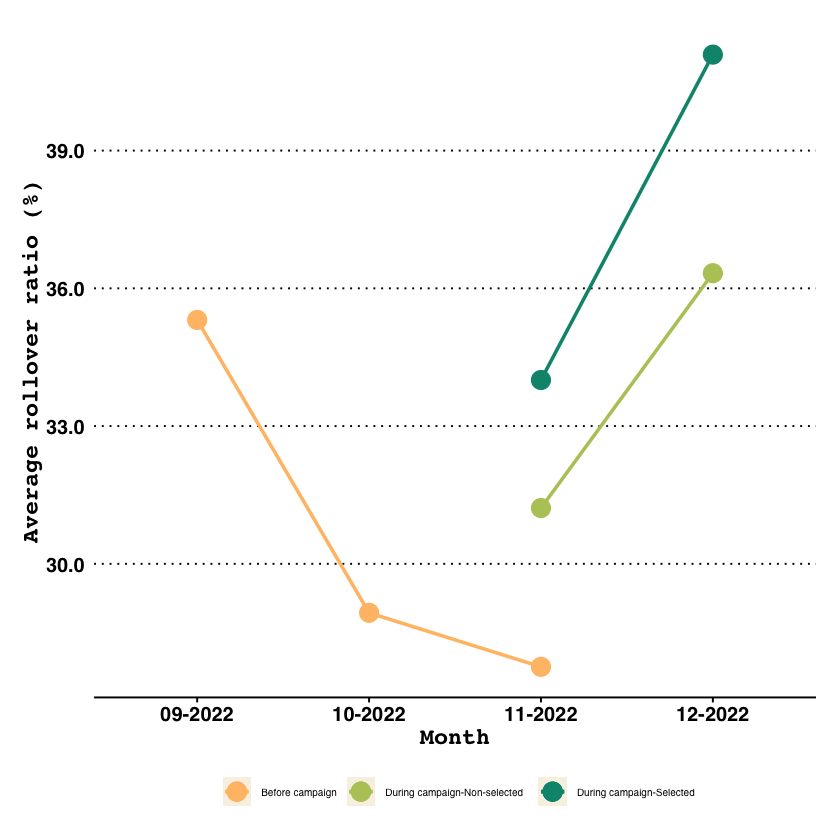

In [73]:
tmp <- sub_df %>% filter(VALUE_DATE < cam_date) %>% filter(CLIENT_NO %in% boths) %>%
                group_by(MONTH) %>%
                summarise(ARR = mean(ROLLOVER_FLAG, na.rm = TRUE) * 100)
tmp_ <- sub_df %>% filter(VALUE_DATE >= cam_date) %>% filter(CLIENT_NO %in% c(selected_t10, selected)) %>%
                group_by(MONTH) %>% 
                summarise(ARR = mean(ROLLOVER_FLAG, na.rm = TRUE) * 100)
tmp__ <- sub_df %>% filter(VALUE_DATE >= cam_date) %>% filter(CLIENT_NO %in% c(non_selected_t10, non_selected)) %>%
                group_by(MONTH) %>% 
                summarise(ARR = mean(ROLLOVER_FLAG, na.rm = TRUE) * 100)
ggplot() + 
geom_line(data = tmp , aes(x = MONTH, y = ARR, group = 1, color = 'Before campaign'), size = 1) +
geom_point(data = tmp , aes(x = MONTH, y = ARR, group = 1, color = 'Before campaign'), size = 5) +
geom_line(data = tmp__ , aes(x = MONTH, y = ARR, group = 1, color = 'During campaign-Non-selected'), size = 1) +
geom_point(data = tmp__ , aes(x = MONTH, y = ARR, group = 1, color = 'During campaign-Non-selected'), size = 5) +
geom_line(data = tmp_ , aes(x = MONTH, y = ARR, group = 1, color = 'During campaign-Selected'), size = 1) +
geom_point(data = tmp_ , aes(x = MONTH, y = ARR, group = 1, color = 'During campaign-Selected'), size = 5) +
scale_y_continuous(labels = comma) +
labs(x = 'Month', y = 'Average rollover ratio (%)') +
theme_wsj() +
scale_color_manual(values = c('#FFC074','#B6C867','#01937C')) + 
# theme(legend.title = element_blank(), legend.position = 'bottom', axis.title.y= element_text())
theme(legend.title = element_blank(), legend.position = 'bottom',axis.title.y= element_text(), axis.text=element_text(size=12),
      axis.title=element_text(size=14,face="bold"), plot.caption = element_text(size = 10, face = 'italic'),
      legend.text = element_text(size = 6),panel.background = element_rect(fill = 'white'), plot.background = element_rect(fill = 'white'),
      legend.background = element_rect(fill = 'white'))

## Average rollover ratio per cust

`summarise()` has grouped output by 'MONTH'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'MONTH'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'MONTH'. You can override using the `.groups` argument.



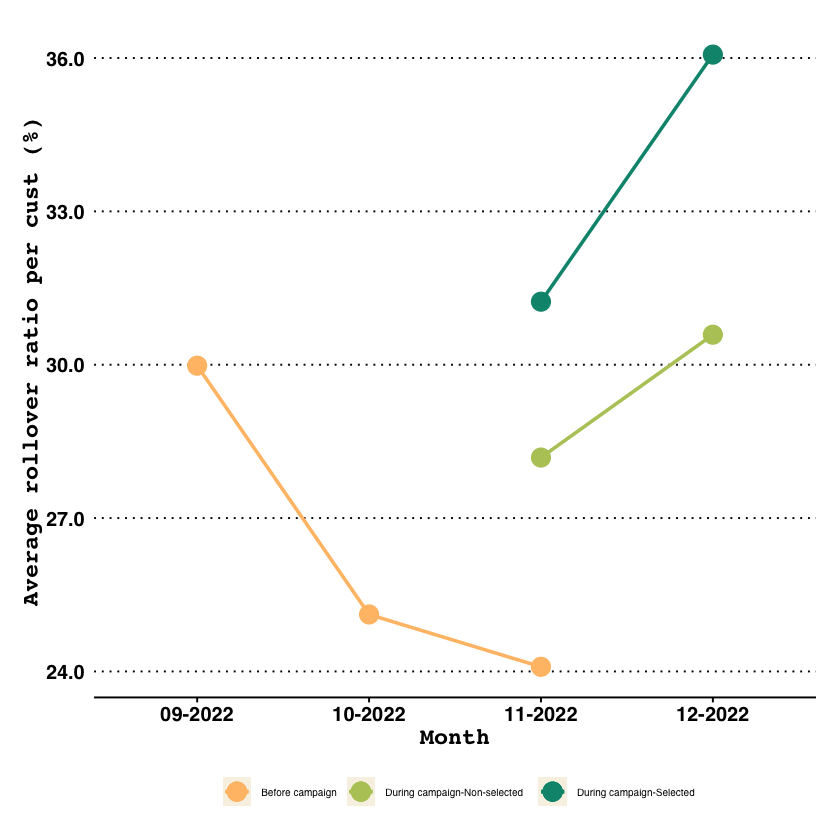

In [75]:
tmp <- sub_df %>% filter(VALUE_DATE < cam_date) %>% filter(CLIENT_NO %in% boths) %>%
                group_by(MONTH, CLIENT_NO) %>%
                summarise(ARR = mean(ROLLOVER_FLAG, na.rm = TRUE) * 100) %>%
                group_by(MONTH) %>%
                summarise(ARR = mean(ARR, na.rm = TRUE))
tmp_ <- sub_df %>% filter(VALUE_DATE >= cam_date) %>% filter(CLIENT_NO %in% c(selected_t10, selected)) %>%
                group_by(MONTH, CLIENT_NO) %>%
                summarise(ARR = mean(ROLLOVER_FLAG, na.rm = TRUE) * 100) %>%
                group_by(MONTH) %>%
                summarise(ARR = mean(ARR, na.rm = TRUE))
tmp__ <- sub_df %>% filter(VALUE_DATE >= cam_date) %>% filter(CLIENT_NO %in% c(non_selected_t10, non_selected)) %>%
                group_by(MONTH, CLIENT_NO) %>%
                summarise(ARR = mean(ROLLOVER_FLAG, na.rm = TRUE) * 100) %>%
                group_by(MONTH) %>%
                summarise(ARR = mean(ARR, na.rm = TRUE))
ggplot() + 
geom_line(data = tmp , aes(x = MONTH, y = ARR, group = 1, color = 'Before campaign'), size = 1) +
geom_point(data = tmp , aes(x = MONTH, y = ARR, group = 1, color = 'Before campaign'), size = 5) +
geom_line(data = tmp__ , aes(x = MONTH, y = ARR, group = 1, color = 'During campaign-Non-selected'), size = 1) +
geom_point(data = tmp__ , aes(x = MONTH, y = ARR, group = 1, color = 'During campaign-Non-selected'), size = 5) +
geom_line(data = tmp_ , aes(x = MONTH, y = ARR, group = 1, color = 'During campaign-Selected'), size = 1) +
geom_point(data = tmp_ , aes(x = MONTH, y = ARR, group = 1, color = 'During campaign-Selected'), size = 5) +
scale_y_continuous(labels = comma) +
labs(x = 'Month', y = 'Average rollover ratio per cust (%)') +
theme_wsj() +
scale_color_manual(values = c('#FFC074','#B6C867','#01937C')) + 
# theme(legend.title = element_blank(), legend.position = 'bottom', axis.title.y= element_text())
theme(legend.title = element_blank(), legend.position = 'bottom',axis.title.y= element_text(), axis.text=element_text(size=12),
      axis.title=element_text(size=14,face="bold"), plot.caption = element_text(size = 10, face = 'italic'),
      legend.text = element_text(size = 6),panel.background = element_rect(fill = 'white'), plot.background = element_rect(fill = 'white'),
      legend.background = element_rect(fill = 'white'))

## Average elapse on next opening TD during campaign

`summarise()` has grouped output by 'MONTH'. You can override using the `.groups` argument.



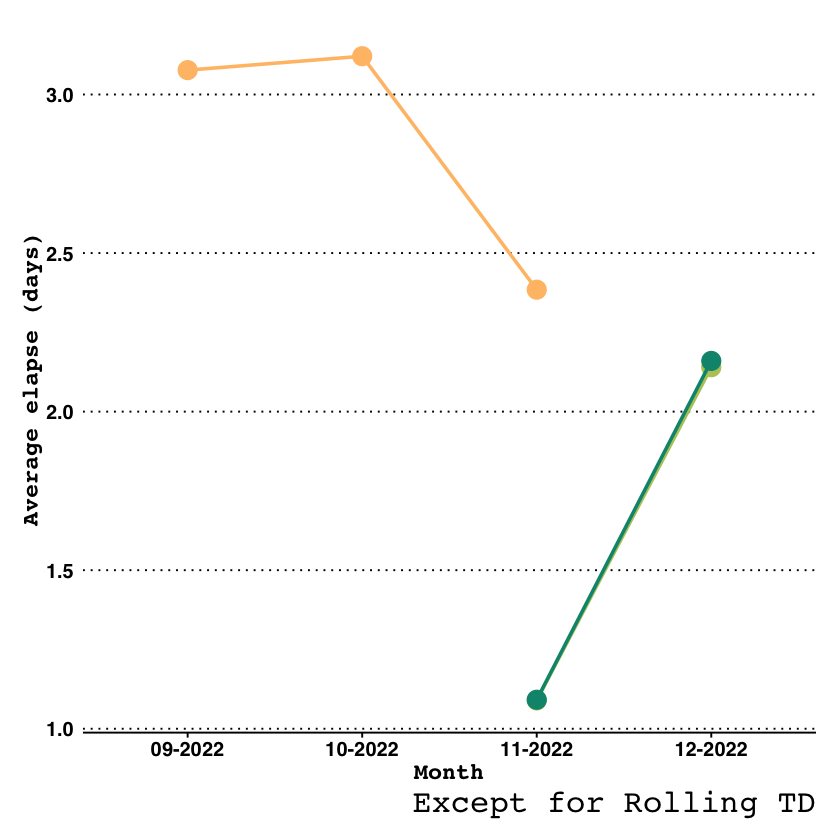

In [97]:
t <- sub_df %>% group_by(MONTH,CLIENT_NO) %>% arrange(VALUE_DATE, .by_group = TRUE) %>% summarise(MIN = min(VALUE_DATE))
t_ <- left_join(sub_df, t, by = c('MONTH','CLIENT_NO')) %>% mutate(NEXT = ifelse(VALUE_DATE == MIN, 0, 1))

tmp <- t_ %>% filter(VALUE_DATE < cam_date) %>% filter(CLIENT_NO %in% boths) %>% filter(NEXT == 1) %>%
                group_by(MONTH, CLIENT_NO) %>%
                arrange(VALUE_DATE, .by_group = TRUE) %>% 
                mutate(LAG_VALUE_DATE = lag(VALUE_DATE)) %>% 
                mutate(DIFF = as.numeric(VALUE_DATE - LAG_VALUE_DATE)) %>% 
                group_by(MONTH) %>% summarise(DIFF = mean(DIFF, na.rm = TRUE))

tmp_ <- t_ %>% filter(VALUE_DATE >= cam_date) %>% filter(CLIENT_NO %in% c(selected_t10, selected)) %>% filter(NEXT == 1) %>%
                group_by(MONTH, CLIENT_NO) %>%
                arrange(VALUE_DATE, .by_group = TRUE) %>% 
                mutate(LAG_VALUE_DATE = lag(VALUE_DATE)) %>% 
                mutate(DIFF = as.numeric(VALUE_DATE - LAG_VALUE_DATE)) %>% 
                group_by(MONTH) %>% summarise(DIFF = mean(DIFF, na.rm = TRUE))
tmp__ <- t_ %>% filter(VALUE_DATE >= cam_date) %>% filter(CLIENT_NO %in% c(non_selected_t10, non_selected)) %>% filter(NEXT == 1) %>%
                group_by(MONTH, CLIENT_NO) %>%
                arrange(VALUE_DATE, .by_group = TRUE) %>% 
                mutate(LAG_VALUE_DATE = lag(VALUE_DATE)) %>% 
                mutate(DIFF = as.numeric(VALUE_DATE - LAG_VALUE_DATE)) %>% 
                group_by(MONTH) %>% summarise(DIFF = mean(DIFF, na.rm = TRUE))


ggplot() + 
geom_line(data = tmp , aes(x = MONTH, y = DIFF, group = 1, color = 'Before campaign'), size = 1) +
geom_point(data = tmp , aes(x = MONTH, y = DIFF, group = 1, color = 'Before campaign'), size = 5) +
geom_line(data = tmp__ , aes(x = MONTH, y = DIFF, group = 1, color = 'During campaign-Non-selected'), size = 1) +
geom_point(data = tmp__ , aes(x = MONTH, y = DIFF, group = 1, color = 'During campaign-Non-selected'), size = 5) +
geom_line(data = tmp_ , aes(x = MONTH, y = DIFF, group = 1, color = 'During campaign-Selected'), size = 1) +
geom_point(data = tmp_ , aes(x = MONTH, y = DIFF, group = 1, color = 'During campaign-Selected'), size = 5) +
labs(x = 'Month', y = 'Average elapse (days)') +
theme_wsj() +
scale_color_manual(values = c('#FFC074','#B6C867','#01937C')) + 
theme(legend.position = 'none',axis.title.y= element_text(), axis.text=element_text(size=12),axis.title=element_text(size=14,face="bold"),
      panel.background = element_rect(fill = 'white'), plot.background = element_rect(fill = 'white'))

## Average elapse on next opening TD during campaign per cust

`summarise()` has grouped output by 'MONTH'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'MONTH'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'MONTH'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'MONTH'. You can override using the `.groups` argument.



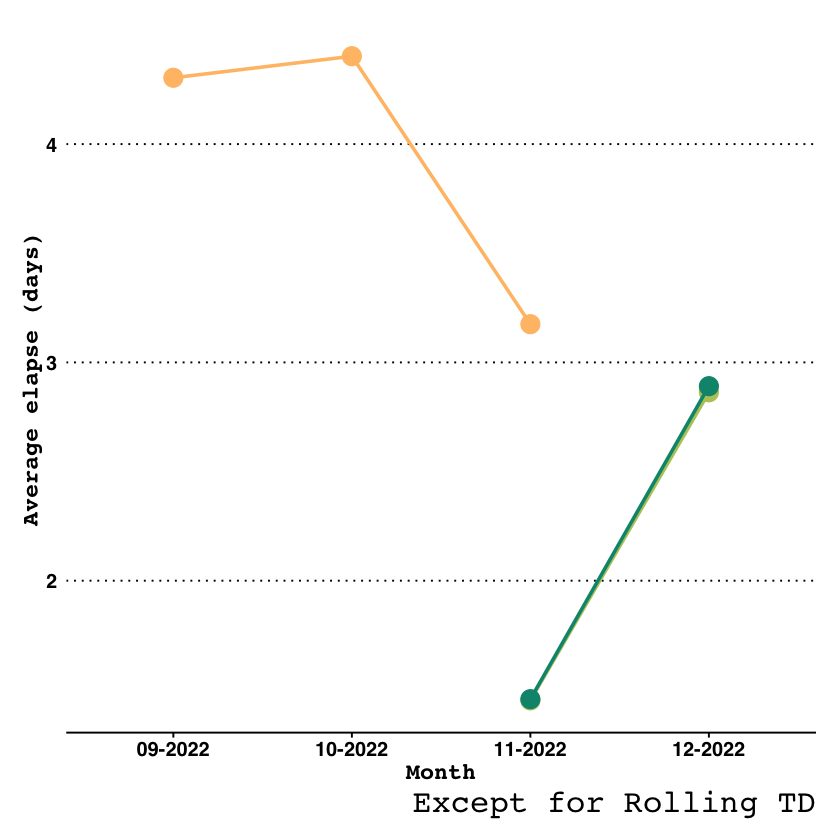

In [96]:
tmp_func <- function(vec) {
    if (length(vec) > 1){
        return(as.numeric(mean(diff(vec[order(vec)]))))
    } else {
        return(NA)
    }
}
t <- sub_df %>% group_by(MONTH,CLIENT_NO) %>% arrange(VALUE_DATE, .by_group = TRUE) %>% summarise(MIN = min(VALUE_DATE))
t_ <- left_join(sub_df, t, by = c('MONTH','CLIENT_NO')) %>% mutate(NEXT = ifelse(VALUE_DATE == MIN, 0, 1))
        
tmp <- t_ %>% filter(VALUE_DATE < cam_date) %>% filter(CLIENT_NO %in% boths) %>% filter(NEXT == 1) %>%
                group_by(MONTH, CLIENT_NO) %>%
                arrange(VALUE_DATE, .by_group = TRUE) %>% 
                summarise(Dif = tmp_func(VALUE_DATE)) %>%
                group_by(MONTH) %>% summarise(ADif = mean(Dif, na.rm = TRUE))

tmp_ <- t_ %>% filter(VALUE_DATE >= cam_date) %>% filter(CLIENT_NO %in% c(selected_t10, selected)) %>% filter(NEXT == 1) %>%
                group_by(MONTH, CLIENT_NO) %>%
                arrange(VALUE_DATE, .by_group = TRUE) %>% 
                summarise(Dif = tmp_func(VALUE_DATE)) %>%
                group_by(MONTH) %>% summarise(ADif = mean(Dif, na.rm = TRUE))
tmp__ <- t_ %>% filter(VALUE_DATE >= cam_date) %>% filter(CLIENT_NO %in% c(non_selected_t10, non_selected)) %>% filter(NEXT == 1) %>%
                group_by(MONTH, CLIENT_NO) %>%
                arrange(VALUE_DATE, .by_group = TRUE) %>% 
                summarise(Dif = tmp_func(VALUE_DATE)) %>%
                group_by(MONTH) %>% summarise(ADif = mean(Dif, na.rm = TRUE))


ggplot() + 
geom_line(data = tmp , aes(x = MONTH, y = ADif, group = 1, color = 'Before campaign'), size = 1) +
geom_point(data = tmp , aes(x = MONTH, y = ADif, group = 1, color = 'Before campaign'), size = 5) +
geom_line(data = tmp__ , aes(x = MONTH, y = ADif, group = 1, color = 'During campaign-Non-selected'), size = 1) +
geom_point(data = tmp__ , aes(x = MONTH, y = ADif, group = 1, color = 'During campaign-Non-selected'), size = 5) +
geom_line(data = tmp_ , aes(x = MONTH, y = ADif, group = 1, color = 'During campaign-Selected'), size = 1) +
geom_point(data = tmp_ , aes(x = MONTH, y = ADif, group = 1, color = 'During campaign-Selected'), size = 5) +
labs(x = 'Month', y = 'Average elapse (days)') +
theme_wsj() +
scale_color_manual(values = c('#FFC074','#B6C867','#01937C')) + 
theme(legend.position = 'none',axis.title.y= element_text(), axis.text=element_text(size=12),axis.title=element_text(size=14,face="bold"),
      panel.background = element_rect(fill = 'white'), plot.background = element_rect(fill = 'white'))

## Average TD balance on next opening TD during campaign

`summarise()` has grouped output by 'MONTH'. You can override using the `.groups` argument.



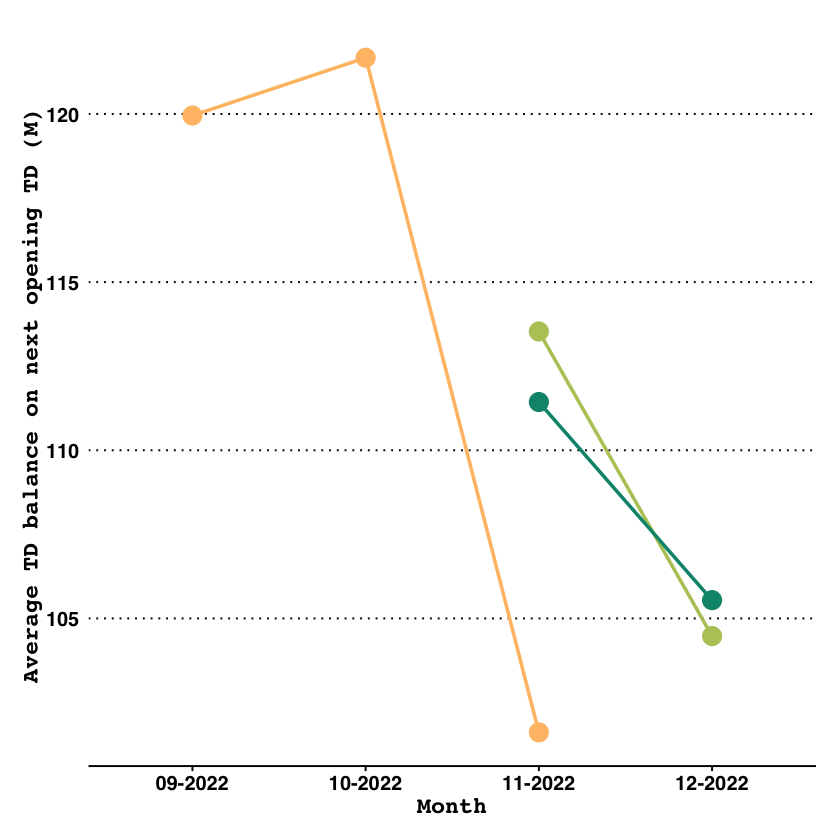

In [95]:
t <- sub_df %>% group_by(MONTH,CLIENT_NO) %>% arrange(VALUE_DATE, .by_group = TRUE) %>% summarise(MIN = min(VALUE_DATE))
t_ <- left_join(sub_df, t, by = c('MONTH','CLIENT_NO')) %>% mutate(NEXT = ifelse(VALUE_DATE == MIN, 0, 1))

tmp <- t_ %>% filter(VALUE_DATE < cam_date) %>% filter(CLIENT_NO %in% boths) %>% filter(NEXT == 1) %>%
                group_by(MONTH) %>% 
                summarise(AMT = mean(OPENING_AMOUNT, na.rm = TRUE)/10^6)

tmp_ <- t_ %>% filter(VALUE_DATE >= cam_date) %>% filter(CLIENT_NO %in% c(selected_t10, selected)) %>% filter(NEXT == 1) %>%
                group_by(MONTH) %>% 
                summarise(AMT = mean(OPENING_AMOUNT, na.rm = TRUE)/10^6)
tmp__ <- t_ %>% filter(VALUE_DATE >= cam_date) %>% filter(CLIENT_NO %in% c(non_selected_t10, non_selected)) %>% filter(NEXT == 1) %>%
                group_by(MONTH) %>% 
                summarise(AMT = mean(OPENING_AMOUNT, na.rm = TRUE)/10^6)


ggplot() + 
geom_line(data = tmp , aes(x = MONTH, y = AMT, group = 1, color = 'Before campaign'), size = 1) +
geom_point(data = tmp , aes(x = MONTH, y = AMT, group = 1, color = 'Before campaign'), size = 5) +
geom_line(data = tmp__ , aes(x = MONTH, y = AMT, group = 1, color = 'During campaign-Non-selected'), size = 1) +
geom_point(data = tmp__ , aes(x = MONTH, y = AMT, group = 1, color = 'During campaign-Non-selected'), size = 5) +
geom_line(data = tmp_ , aes(x = MONTH, y = AMT, group = 1, color = 'During campaign-Selected'), size = 1) +
geom_point(data = tmp_ , aes(x = MONTH, y = AMT, group = 1, color = 'During campaign-Selected'), size = 5) +
labs(x = 'Month', y = 'Average TD balance on next opening TD (M)') +
theme_wsj() +
scale_color_manual(values = c('#FFC074','#B6C867','#01937C')) + 
theme(legend.position = 'none',axis.title.y= element_text(), axis.text=element_text(size=12),axis.title=element_text(size=14,face="bold"),
      panel.background = element_rect(fill = 'white'), plot.background = element_rect(fill = 'white'))

## Average TD balance on next opening TD during campaign per cust

`summarise()` has grouped output by 'MONTH'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'MONTH'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'MONTH'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'MONTH'. You can override using the `.groups` argument.



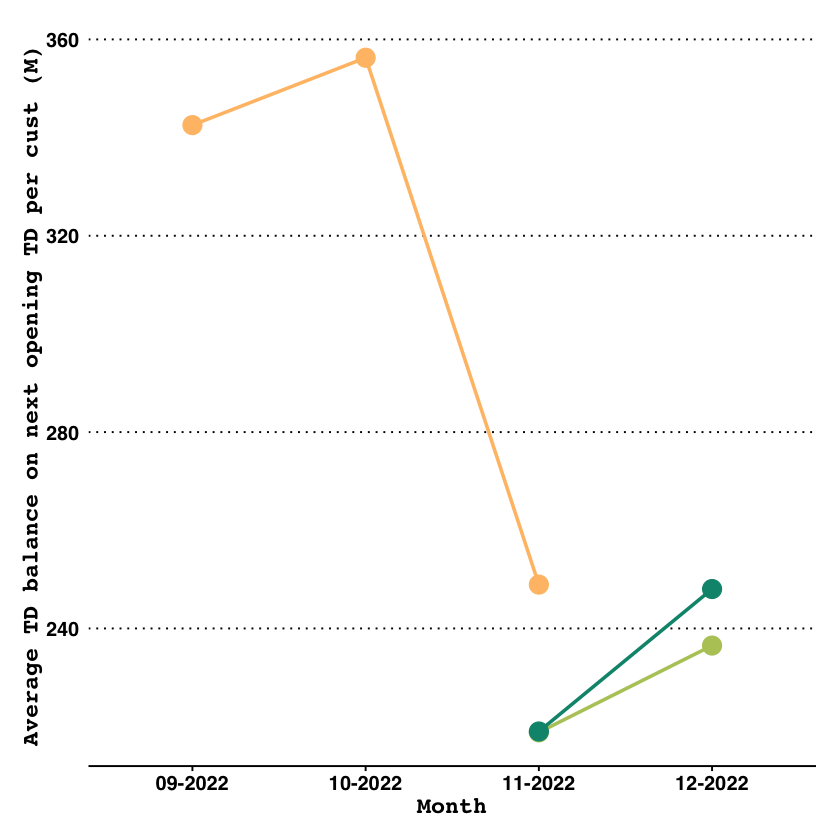

In [100]:
t <- sub_df %>% group_by(MONTH,CLIENT_NO) %>% arrange(VALUE_DATE, .by_group = TRUE) %>% summarise(MIN = min(VALUE_DATE))
t_ <- left_join(sub_df, t, by = c('MONTH','CLIENT_NO')) %>% mutate(NEXT = ifelse(VALUE_DATE == MIN, 0, 1))

tmp <- t_ %>% filter(VALUE_DATE < cam_date) %>% filter(CLIENT_NO %in% boths) %>% filter(NEXT == 1) %>%
                group_by(MONTH, CLIENT_NO) %>% 
                summarise(AMT = sum(OPENING_AMOUNT, na.rm = TRUE)/10^6) %>%
                group_by(MONTH) %>%
                summarise(AMT = mean(AMT, na.rm = TRUE))

tmp_ <- t_ %>% filter(VALUE_DATE >= cam_date) %>% filter(CLIENT_NO %in% c(selected_t10, selected)) %>% filter(NEXT == 1) %>%
                group_by(MONTH, CLIENT_NO) %>% 
                summarise(AMT = sum(OPENING_AMOUNT, na.rm = TRUE)/10^6) %>%
                group_by(MONTH) %>%
                summarise(AMT = mean(AMT, na.rm = TRUE))
tmp__ <- t_ %>% filter(VALUE_DATE >= cam_date) %>% filter(CLIENT_NO %in% c(non_selected_t10, non_selected)) %>% filter(NEXT == 1) %>%
                group_by(MONTH, CLIENT_NO) %>% 
                summarise(AMT = sum(OPENING_AMOUNT, na.rm = TRUE)/10^6) %>%
                group_by(MONTH) %>%
                summarise(AMT = mean(AMT, na.rm = TRUE))


ggplot() + 
geom_line(data = tmp , aes(x = MONTH, y = AMT, group = 1, color = 'Before campaign'), size = 1) +
geom_point(data = tmp , aes(x = MONTH, y = AMT, group = 1, color = 'Before campaign'), size = 5) +
geom_line(data = tmp__ , aes(x = MONTH, y = AMT, group = 1, color = 'During campaign-Non-selected'), size = 1) +
geom_point(data = tmp__ , aes(x = MONTH, y = AMT, group = 1, color = 'During campaign-Non-selected'), size = 5) +
geom_line(data = tmp_ , aes(x = MONTH, y = AMT, group = 1, color = 'During campaign-Selected'), size = 1) +
geom_point(data = tmp_ , aes(x = MONTH, y = AMT, group = 1, color = 'During campaign-Selected'), size = 5) +
labs(x = 'Month', y = 'Average TD balance on next opening TD per cust (M)') +
theme_wsj() +
scale_color_manual(values = c('#FFC074','#B6C867','#01937C')) + 
theme(legend.position = 'none',axis.title.y= element_text(), axis.text=element_text(size=12),axis.title=element_text(size=14,face="bold"),
      panel.background = element_rect(fill = 'white'), plot.background = element_rect(fill = 'white'))